In [1]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# logit

In [2]:
logdir='../IPG/test/log'; date='06_12_2021'
subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.8]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]; excludes=None

In [3]:
inexact_type=1; param1_lst = [1e-12]; param2_lst = ['empty']
algo_df_dict_inexact_type1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type1)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type1_best = '1-projectedGD-True-1e-12-empty'
print('Best params:', inexact_type1_best)

1-projectedGD-True-1e-12-empty
 54/54 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 39 instances are kept.
Best params: 1-projectedGD-True-1e-12-empty


In [5]:
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty'][algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']['status'] != 0]
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']

In [6]:
inexact_type=2; param1_lst = [1e-12]; param2_lst = [0.1, 0.5, 0.5]
algo_df_dict_inexact_type2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type2_best = get_best(pools)
# inexact_type2_best = '2-projectedGD-True-1e-12-0.5'
print('Best params:', inexact_type2_best)

2-projectedGD-True-1e-12-0.1
 54/54 instances terminate with status:  0
2-projectedGD-True-1e-12-0.5
 54/54 instances terminate with status:  0
2-projectedGD-True-1e-12-0.5
 54/54 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: 2-projectedGD-True-1e-12-0.1


In [7]:
inexact_type=3; param1_lst = [3.0]; param2_lst = [1e-1, 1e0,  1e3, 1e5]
algo_df_dict_inexact_type3 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type3)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
# print("=================")
inexact_type3_best = get_best(pools)
# inexact_type3_best = '3-projectedGD-True-3.0-1.0'
print('Best params:', inexact_type3_best)

3-projectedGD-True-3.0-0.1
 51/54 instances terminate with status:  0
  3/54 instances terminate with status:  2
3-projectedGD-True-3.0-1.0
 53/54 instances terminate with status:  0
  1/54 instances terminate with status:  2
3-projectedGD-True-3.0-1000.0
 54/54 instances terminate with status:  0
3-projectedGD-True-3.0-100000.0
 54/54 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: 3-projectedGD-True-3.0-1000.0


All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 39 instances are kept.


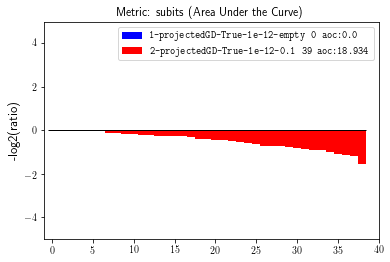

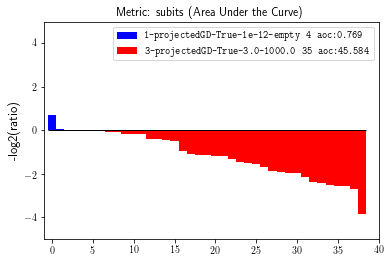

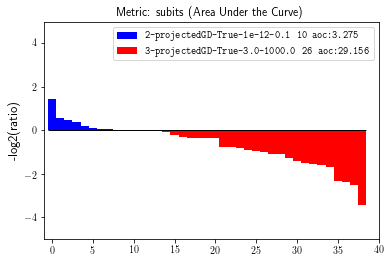

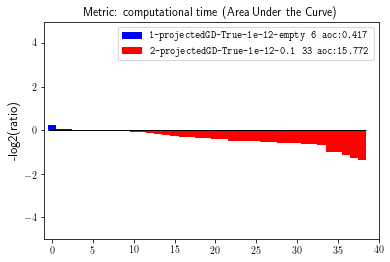

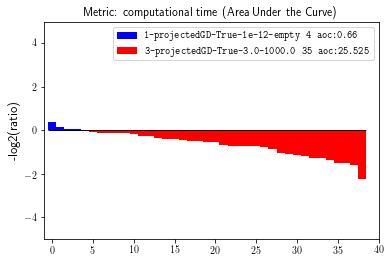

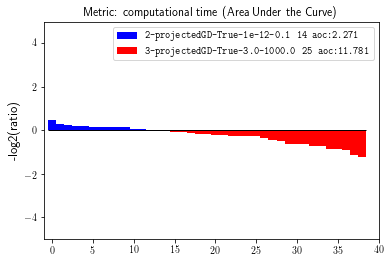

In [8]:
final = {}
final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
final[inexact_type3_best] = algo_df_dict_inexact_type3[inexact_type3_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='subits',show_num=True, options={'ratio_max':5})
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':5})

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.


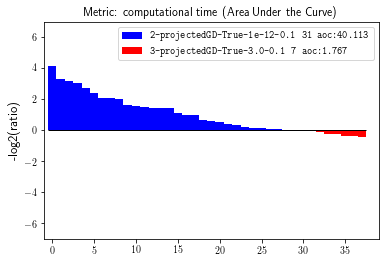

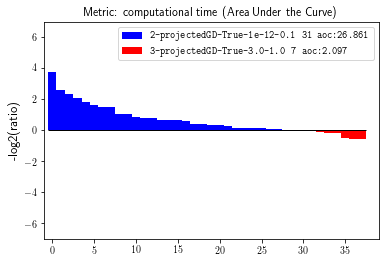

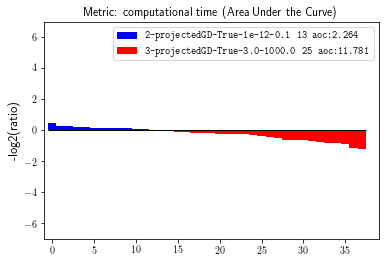

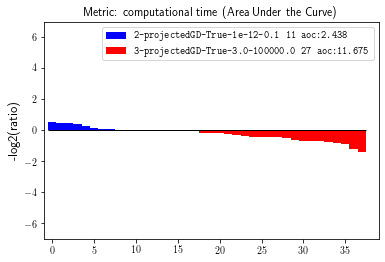

In [9]:
for c in [1e-1, 1e0,  1e3, 1e5]:
    final = {}
    final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})